In [1]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import datetime as dt



In [2]:
df = pd.read_csv('breast_cancer.csv')
print(df.shape)
df.head()

(569, 33)


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
df.drop(columns=['id' , 'Unnamed: 32'] , axis=1 , inplace=True)

In [6]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['diagnosis']), df['diagnosis'], test_size=0.2)

In [66]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [67]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [76]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train_scaled,y_train)

,n_neighbors,15
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [77]:
from sklearn.metrics import accuracy_score
y_pred = knn.predict(X_test_scaled)

In [78]:
round(accuracy_score(y_test , y_pred)*100,2)

99.12

**how to select value of k**

In [88]:
scores = []
for i in range(1,21):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train_scaled,y_train)
    scores.append(round(accuracy_score(y_test,knn.predict(X_test_scaled))*100,2))

In [89]:
scores

[94.74,
 95.61,
 97.37,
 97.37,
 98.25,
 98.25,
 97.37,
 98.25,
 98.25,
 97.37,
 97.37,
 97.37,
 98.25,
 97.37,
 99.12,
 98.25,
 98.25,
 97.37,
 97.37,
 97.37]

In [90]:
max(scores) , scores.index(max(scores))+1

(99.12, 15)

In [91]:
import matplotlib.pyplot as plt;


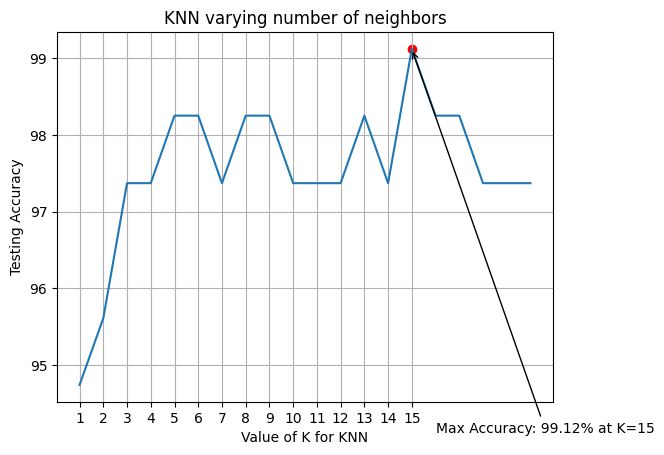

In [92]:
# plot scores and highlight the max score and also show the value of k for max score
plt.plot(range(1,21) , scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')
plt.title('KNN varying number of neighbors')
plt.xticks(range(1,16))
plt.grid()
plt.scatter(scores.index(max(scores))+1 , max(scores) , color='red' )
plt.annotate(f'Max Accuracy: {max(scores)}% at K={scores.index(max(scores))+1}' , xy=(scores.index(max(scores))+1 , max(scores)) , xytext=(scores.index(max(scores))+1+1 , max(scores)-5) , arrowprops=dict(facecolor='black' , arrowstyle='->'))
plt.show()